# LinearAlgebraHW

### 1.Explain the dot product and cross product in your own words in markdown. Use LaTeX to properly show the equations.


### Dot Product

The dot product gives us the angle between any two vectors.A dot product is scalar. The result of the dot product is not another vector – it's just another number or a scalar. That's why we often call the dot product as scalar product.

Mathematical formula for dot product:

$$\vec{a} \cdot \vec{b}=| \vec{a}| | \vec{b}|\cos\theta $$

where:
* θ is the angle between a and b
* |a| and |b| are the magnitudes of vectors a and b

### Cross Product

The cross product a × b is defined as a vector c that is perpendicular (orthogonal) to both a and b, with a direction given by the right-hand rule and a magnitude equal to the area of the parallelogram that the vectors span. It is also called vector product.

Mathematical formula for cross product:

$$\vec{a} \times \vec{b} =| \vec{a}\| |\vec{b}| \sin \theta \hat{n}$$

where:
* θ is the angle between a and b in the plane containing them (hence, it is between 0° and 180°)
* |a| and |b| are the magnitudes of vectors a and b
* n is a unit vector perpendicular to the plane containing a and b, in the direction given by the right-hand rule.

In [1]:
import numpy as np
import pandas as pd
from numpy import matrix

### 2.Write a function angle_between(v1, v2) where v1 and v2 are two vectors that are passed in, and the angle between them is calculated. 


The angle between two vectors is defined using the inverse cosine of the ratio of the dot product of the two vectors and the product of their magnitudes.

In [2]:
#Inverse cosine transform can be calculated by using arccos inbuilt function in python. We can import arccos from numpy.
from numpy import arccos
import math

def angle_between(v1, v2):
    try:
        v1_unit=v1/np.linalg.norm(v1)
        v2_unit=v2/np.linalg.norm(v2)
        angle=np.arccos(sum(v1_unit*v2_unit for v1_unit,v2_unit in zip(v1_unit,v2_unit)))
        print('angle in radian: ',angle)
        degrees=angle*(180/math.pi)
        print('angle in degrees: ',degrees,u"\N{DEGREE SIGN}")
    
    except ValueError:
        print("Oops!  That was no valid number.  Try again...")
    except Exception as e:
        print('Caught Exception:', e)
    
    

In [3]:
#calling the function for various dimensions of vectors 
#1D vector
v1=np.array([0,1])
v2=np.array([1,0])
angle_between(v1,v2)
v1.ndim

angle in radian:  1.5707963267948966
angle in degrees:  90.0 °


1

In [4]:
#3D vector
v1=np.array([[[1],[0],[-1]]])
v2=np.array([[[1],[0],[-1]]])
angle_between(v1,v2)
#we can check our dimesion by using .ndim method
v1.ndim

angle in radian:  [[1.04719755]
 [1.57079633]
 [1.04719755]]
angle in degrees:  [[60.]
 [90.]
 [60.]] °


3

In [5]:
#4D vector
v1=np.array([[[[2],[1]]]])
v2=np.array([[[[8],[3]]]])
angle_between(v1,v2)
v1.ndim

angle in radian:  [[[0.57814412]
  [1.41311657]]]
angle in degrees:  [[[33.12521796]
  [80.96561517]]] °


4

### 3.Write a function called row_dot(A, r1, r2) which takes an input matrix called A, one row number identified by r1, and another row number identified by r2 and returns the dot product of the r1 and r2 rows (indexing starts at 0).


In [6]:
def row_dot(A,r1,r2):
    try:
        #extracting row 1 from matrix A
        r1=A[0:1]
        #extracting row 2 from A
        r2=A[1:2]
        result= sum(r1*r2 for r1,r2 in zip(r1,r2))
        return result
    
    except ValueError:
        print("Oops!That was no valid number.")
    except TypeError: # Except specific error
        print("Can't multiply by that type")
    except Exception as e: #Except all other errors
        print('Caught Exception: ',e) 
    

In [7]:
# giving input matrix A(3x3)
A=np.array([[2,3,1],[9,3,1],[5,3,8]])
r1=A[0:1]
r2=A[1:2]
#calling row_dot function
row_dot(A,r1,r2)

array([18,  9,  1])

In [8]:
A=np.array([[2,3,1],[3,1],[5,3,8]])
#calling row_dot function
row_dot(A,r1,r2)

Can't multiply by that type


C:\Users\Codergirl\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [9]:
# giving input matrix A (4x4)
A=np.array([[5,3,1,2],[2,4,-2,3],[5,1,3,8],[4,3,6,1]])
#extracting row 1 from matrix A
r1 =A[0:1]
#extracting row 2 from A
r2 =A[1:2]
#calling row_dot function
row_dot(A,r1,r2)

array([10, 12, -2,  6])

### 4.Write a function matrix_division(m1, m2) that takes in two matrices, m1 and m2, and returns the result. What is the trick with matrix division?


* We don't really divide matrices. We multiply one matrix by the inverse of other. Its like instead of dividing 12 by 3(12/3), multiplying 12 with inverse of 3(12*1/3)

In [11]:
#Function to calculate matrix division
def matrix_division(m1, m2):
    try:
        inverse_m2=np.linalg.inv(m2)
        div=m1*inverse_m2
        return div
    
    except TypeError: # Except specific error
        print("Can't divite by that type!")
    except Exception as e: #Except all other errors
        print('Exception: ',e) 

In [12]:
#calling matrix division for 3x3 matrix
m1=matrix('2,1,1;9,4,3;5,3,8')
m2=matrix('1,-1,5;3,7,-2;0,0,0')
matrix_division(m1,m2)

Exception:  Singular matrix


In [14]:
#calling matrix division for 3x3 matrix
m1=matrix('2,1,1;9,4,3;5,3,8')
m2=matrix('1,-1,5;3,7,-2;1,1,6')
matrix_division(m1,m2)

matrix([[ 1.45454545,  0.47727273, -0.88636364],
        [ 6.90909091,  2.20454545, -4.52272727],
        [ 2.90909091,  0.95454545, -0.77272727]])

In [15]:
#bonus:
#calling matrix division for 4x4 matrix
m1=matrix('1,2,3,4;4,3,2,1;-1,-2,4,2;9,4,2,8')
m2=matrix('1,-1,5,2;3,7,-2,-6;9,1,-5,-2;2,6,3,1')
matrix_division(m1,m2)


matrix([[-0.11212121, -0.57575758,  0.1       ,  0.96969697],
        [ 0.33030303, -0.06060606,  0.3       ,  0.57575758],
        [ 0.69636364, -0.07272727, -0.14      , -0.10909091],
        [-0.40666667, -1.46666667,  1.06      ,  2.13333333]])

### 5. Write a function is_orthogonal(v1,v2, tol), where v1 and v2 are column vectors of the same size and tol is a scalar value strictly larger than 0. The output should be 1 if the angle between v1 and v2 is within tol of π/2; that is, |π/2−θ|<tol, and 0 otherwise. You may assume that v1 and v2 are column vectors of the same size, and that tol is a positive scalar.

#### Test cases for problem 4
a = np.array([[1], [0.001]])
b = np.array([[0.001], [1]])
#### output: 1
is_orthogonal(a,b, 0.01)

#### output: 0
is_orthogonal(a,b, 0.001)

#### output: 0
a = np.array([[1], [0.001]])
b = np.array([[1], [1]])
is_orthogonal(a,b, 0.01)

#### output: 1
a = np.array([[1], [1]])
b = np.array([[-1], [1]])
is_orthogonal(a,b, 1e-10)




In [16]:
def is_orthogonal(v1,v2,tol):
    try:
        v1_unit=v1/np.linalg.norm(v1)
        v2_unit=v2/np.linalg.norm(v2)
        angle=np.arccos(sum(v1_unit*v2_unit for v1_unit,v2_unit in zip(v1_unit,v2_unit)))
        #angle=np.arccos(np.dot(v1_unit,v2_unit))
        a=abs((math.pi/2)-angle)
        if tol>0:
            if a<tol:
                print("output: 1")
            else:
                print("output: 0")
        else:
            print("tol is not greater than 0")

    except ValueError:
        print("Oops!That was no valid number.")
    except TypeError as e: # Except specific error
        print("Can't multiply by that type")
    except Exception as e: #Except all other errors
        print('Caught Exception: ',e) 

In [17]:
v1 = np.array([[1], 
               [0.001]]) 
v2 = np.array([[0.001], 
               [1]])
tol=0.01
is_orthogonal(v1,v2,tol)


output: 1


In [18]:
v1 = np.array([[1], 
               [0.001]]) 
v2 = np.array([[0.001], 
               [1]])
tol=0.001

is_orthogonal(v1,v2,tol)


output: 0


In [19]:
v1 = np.array([[1], 
              [0.001]]) 
v2 = np.array([[1], 
              [1]])
tol=0.01

is_orthogonal(v1,v2,tol)



output: 0


In [20]:
v1 = np.array([[1], 
               [1]]) 
v2 = np.array([[-1], 
               [1]])
tol=1e-10

is_orthogonal(v1,v2,tol)


output: 1


In [21]:
v1 = np.array([[1,1]]) 
v2 = np.array([[-1], 
               [1]])
tol=0.1
is_orthogonal(v1,v2,tol)

Oops!That was no valid number.


### 6.Create a class called vector_calculator. __init__ should take self, vector1, and vector2. It should have two methods inside of it that are from problems 1 and 4 above (angle_between and is_orthogonal). Make sure tol is defaulted but can be overwritten. Make sure you can call angle_between and is_orthogonal through the class and return the correct results as in problems 1 and 4. 


In [23]:
class vector_calculator():
    def __init__(self,v1,v2):
        self.v1=v1
        self.v2=v2
        
    def angle_between(self):
        v1_unit=v1/np.linalg.norm(v1)
        v2_unit=v2/np.linalg.norm(v2)
        angle=np.arccos(sum(v1_unit*v2_unit for v1_unit,v2_unit in zip(v1_unit,v2_unit)))
        return angle
        
    def is_orthogonal(self):
        a=abs((math.pi/2)-self.angle_between())
        try:
            if tol>0:
                if a<self.tol:
                    print("output: 1")
                else:
                    print("output: 0")
        except Exception as e: 
            print('Caught Exception: ',e) 
            
v1= np.array([[1], [1]])  
v2=np.array([[-1], [1]])
#Creating an object fro class vector calculator
Calc=vector_calculator(v1,v2)
Calc.tol=1e-10
Calc.angle_between()
Calc.is_orthogonal()

output: 1


In [24]:
v1 = np.array([[1], 
              [0.001]]) 
v2 = np.array([[1], 
              [1]])
Calc=vector_calculator(v1,v2)
Calc.tol=0.01
Calc.angle_between()
Calc.is_orthogonal()


output: 0


In [25]:
v1 = np.array([[1], 
               [0.001]]) 
v2 = np.array([[0.001], 
               [1]])
Calc=vector_calculator(v1,v2)
Calc.tol=0.01
Calc.angle_between()
Calc.is_orthogonal()

output: 1


In [26]:
v1 = np.array([[1], 
               [0.001]]) 
v2 = np.array([[0.001], 
               [1]])
Calc=vector_calculator(v1,v2)
Calc.tol=0.001
Calc.angle_between()
Calc.is_orthogonal()

output: 0


### 7. Show a graphical representation of the breast cancer data outlined in this reading https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python Be sure to describe what PCA is and incorporate the principal components in your plot. This is just exploratory, so there are many correct answers!

### Principal Component Analysis(PCA)
Principal Component Analysis (PCA) is a linear dimensionality reduction technique that can be utilized for extracting information from a high-dimensional data by projecting it into a lower-dimensional data. It tries to preserve the essential parts that have more variation of the data and remove the non-essential parts with fewer variation.


In [ ]:
# Here we are implementing our PCA method to wisconsin breast cancer dataset using scikit learn libraries.

In [27]:
#importing breast cancer dataset from sklearn library
import sklearn
from sklearn import datasets
from sklearn.datasets import load_breast_cancer

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
#To see which attributes are available in the breast_cancer dataset, we can use .keys().
load_breast_cancer().keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [30]:
# We have data attribute to isolate the data, target to see the target values, feature_names to see what are the columns we
#are having etc.
# We have to get the data, target separately and then concatenate them. 
# Loading breast cancer data
breast_data = load_breast_cancer().data

In [31]:
#The first thing we should know about an array is its shape. we can find number of rows,column using shape function
breast_data.shape

(569, 30)

In [32]:
#Now we know that we have 569 rows and 30 columns.
#After we load our data, now we can load target. 
breast_target=load_breast_cancer().target
breast_target.shape

(569,)

In [33]:
#To concatenate data and target, both of them should be in same shape. We can reshape target.
Target= np.reshape(breast_target,(569,1))
Target.shape

(569, 1)

In [34]:
#Concatinating data and target
wisc_breast_data=np.concatenate([breast_data,Target],axis=1)
wisc_breast_data.shape

(569, 31)

In [35]:
#We can convert our dataset into dataframe
wisc_breast_data_df=pd.DataFrame(wisc_breast_data)
wisc_breast_data_df.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [36]:
#Now we can add our feature names here.We have 30 feature names.(feature names is nothing but column names)
features=load_breast_cancer().feature_names
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [37]:
#If we take a look at our feature names, it doesn't have target. So we have to add it manually
column_names= np.append(features,'Target')
column_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension', 'Target'],
      dtype='<U23')

In [38]:
#We are ready to add column names in dataframe
wisc_breast_data_df.columns=column_names
wisc_breast_data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [39]:
# Instead of seeing 0s and 1s in Target column, we can replace it with Target_names.We can bring Target names from our datas.
load_breast_cancer().target_names

array(['malignant', 'benign'], dtype='<U9')

In [40]:
#We just needed only feature columns, we can drop target column to standardize the data
feat=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]
std_df=wisc_breast_data_df.iloc[:,feat]

## Standardizing data using Pipeline
We always normalize the data before we calculate principal components. We can use StandardScaler to scale the df. We have to import StandardScaler and PCA modules from sklearn.We can combine both operations in a pipeline(both in one go). We pass the two operations to the Pipeline() class in the form of two tuples inside a list. 

In [41]:
#importing Pipeline, StandardScaler, PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [42]:
# Fit the pipeline to df1 and transform the data
pipe = Pipeline([('scaler', StandardScaler()),
                ('reducer', PCA(n_components=2))])

principal_components= pipe.fit_transform(std_df)

In [43]:
principal_components_df=pd.DataFrame(principal_components,columns=['Principal_Component_1','Principal_Component_2'])
principal_components_df.tail()

,Principal_Component_1,Principal_Component_2
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010
568,-5.475243,-0.670637


In [44]:
# Once we have the principal components, we can find the explained_variance_ratio. It will give the information of how much
# each principal component holds after projecting the data to a lower dimensional subspace.

print(pipe.steps[1][1].explained_variance_ratio_)

[0.44272026 0.18971182]


#### From the above output, we can say that PrincipalComponent 1 holds 44.2% information, PrincipalComponent 2 holds 19% of information and still 36.8% information was lost.

In [45]:
#Adding target column in the principal_components_df to show the color variation in the plot 
principal_components_df['Target']=Target

Text(0.5, 1.0, 'Principal Component Analysis of Breast Cancer Dataset')

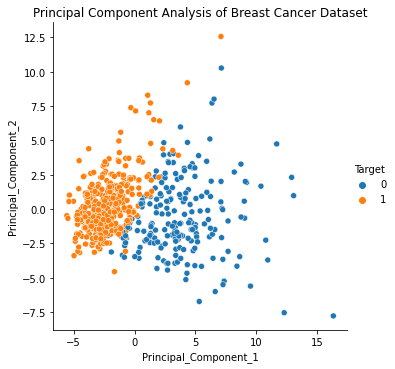

In [46]:
#using seaborn relational plot, we can show scatter plot between two principal components.
sns.relplot(x="Principal_Component_1", y="Principal_Component_2", 
            data=principal_components_df, kind="scatter",hue="Target")

plt.title("Principal Component Analysis of Breast Cancer Dataset")

### Conclusion
From the above graph, we can observe that the targets 0(benign) and 1(malignant), when projected to a two-dimensional space,
can be linearly separable up to some extent. Other observations can be that the benign class is spread out as compared to 
the malignant class. 

Our breast cancer dataset has 30 features. Visualizing all 30 columns in the plot might be difficult to observe the datas. So we have reduced 30 feature columns to 2 columns and visualized the components using PCA.This is the advantage of dimensionality reduction techniques.